<a href="https://colab.research.google.com/github/dreamonm/Capstone-3/blob/main/EDA_plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis


## Import and Load Data

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.dates as mdates
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
import os
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [11]:
# create url variable
url1 ='https://drive.google.com/file/d/1GBovh0ZNVwvFXWv6j5sAmHAZjnCJ0n8h/view?usp=sharing'

# get the data file ID
file_id1 = url1.split('/')[-2]

# create the read url
read_url1='https://drive.google.com/uc?id=' + file_id1

# read the CSV file into a DataFrame
df= pd.read_csv(read_url1)

In [12]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Extract the month, year, week from 'Date'
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['week'] = df['Date'].dt.isocalendar().week

## Dataset Description

In [13]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,month,year,week
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2,2010,5
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,2,2010,6
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,2,2010,7
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,2,2010,8
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,3,2010,9


In [14]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,month,year,week
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.0
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739,6.449510,2010.968591,25.826762
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328,3.243217,0.796876,14.151887
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000,1.000000,2010.000000,1.0
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000,4.000000,2010.000000,14.0
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000,6.000000,2011.000000,26.0
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000,9.000000,2012.000000,38.0
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,12.000000,2012.000000,52.0


In [15]:
print(f"The total number of weeks: {df['Date'].nunique()}")
print(f"The total number of store: {df['Store'].nunique()}")
print(f"The total number of department: {df['Dept'].nunique()}")
print(f"Department: {df['Dept'].unique()}")

The total number of weeks: 143
The total number of store: 45
The total number of department: 81
Department: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 77 78 79 80 81 82 83 85 87 90 91 92 93 94
 95 96 97 98 99 39 50 43 65]


## Stores

In [16]:
# The total number of sales records by department
store_count = pd.DataFrame([{'Store': i,
                             'Num_dept': df[df['Store'] == i]['Dept'].nunique(),
                             'Type': ', '.join(df[df['Store'] == i]['Type'].unique()),
                             'Total Sales': df[df['Store'] == i]['Weekly_Sales'].sum()}
                            for i in range(1, 46)])

fig = px.bar(store_count,
             x='Store',
             y='Num_dept',
             color='Type',
             title='The total number of sales records by department',
             labels={'Dept': 'Department'},
             template='ggplot2')

fig.show()


Here are some facts about the stores:
- If each store has a total of 81 departments, the number of rows in the data would be 521235. However, there are only 421570 records available, indicating that certain departments are not consistently available in all stores.
- The number of departments varies from store to store, with some having as many as 79 and others as few as 61.
- The number of departments in a store appears to be related to its store type, except for stores 33 and 36, which are labeled as type A but have a similar number of departments as type C.  

It's possible that store type is an indicator of store size so that larger stores can have more departments. To verify this assumption, I can use a box plot to compare the size and type.


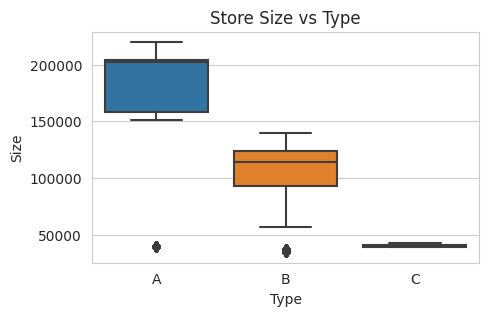

In [17]:
# boxplot to compare the size and type

plt.figure(figsize=(5,3))
sns.set_style("whitegrid")
sns.boxplot(data=df,x='Type',y='Size')
plt.title('Store Size vs Type')
plt.show()

The store types are differentiated by their size, with Type A being the largest and Type C being the smallest. It’s worth noting that there are only a few outliers where the sizes overlap.


In [18]:
print('Identifying outlier store in Type A:', ', '.join(str(store) for store in df[(df['Size'] < 50000) & (df['Type'] == 'A')]['Store'].unique()))
print('Identifying outlier store in Type B:', ', '.join(str(store) for store in df[(df['Size'] < 50000) & (df['Type'] == 'B')]['Store'].unique()))


Identifying outlier store in Type A: 33, 36
Identifying outlier store in Type B: 3, 5


Based on the figures ‘The total number of department by store’ and ‘Store Size vs Type’, stores 33 and 35 show significant deviation from the expected patterns. As a result, I can conclude that they have been mislabeled as type A. However, stores 3 and 5 do not clearly stand out from other type B stores.

In [19]:
# The total sales by store
fig = px.bar(store_count,
             x='Store',
             y='Total Sales',
             color='Type',
             title='The total sales by store',
             template='ggplot2')

fig.show()

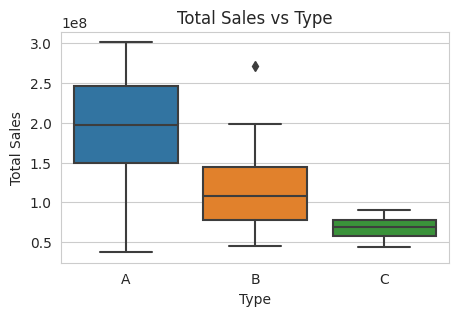

In [20]:
# boxplot to compare the total sales and type

plt.figure(figsize=(5,3))
sns.set_style("whitegrid")
sns.boxplot(data=store_count,x='Type',y='Total Sales')
plt.title('Total Sales vs Type')
plt.show()

- Although Type A stores have the highest median sales, followed by Type B and Type C in that order, there seems to be no clear relationship between store type and overall sales.

- It is worth noting that Type C stores tend to be clustered around the median. Stores 33 and 35 have comparable total sales to Type C stores, which further supports the above observation.

In [21]:
#Correct store type.
df.loc[df['Store'].isin([33, 36]), 'Type'] = 'C'

## Department

In [22]:
# The total number of sales records and total sales by department

dept_list = df['Dept'].unique()
dept_count = pd.DataFrame([{'Num_Store': df[df['Dept'] == i]['Store'].nunique(),
                            'Dept': i, 'Total Sales': df[df['Dept'] == i]['Weekly_Sales'].sum() }
                           for i in dept_list])
df_dept = df['Dept'].value_counts().reset_index().rename(columns={'Dept': 'count','index':'Dept'})
dept_count = pd.merge(dept_count, df_dept, how='inner', on='Dept')

dept_count

fig = make_subplots(rows=2, cols=1, vertical_spacing=0.15,
                    subplot_titles=['The total number of sales records by department', 'The total sales by department'])


fig.add_trace(go.Bar(x=dept_count['Dept'], y=dept_count['count'], name='Sales Records'), row=1, col=1)
fig.add_trace(go.Bar(x=dept_count['Dept'], y=dept_count['Total Sales'], name='Total Sales'), row=2, col=1)


fig.update_layout( showlegend=False)

fig.update_xaxes(title_text='Department', row=1, col=1)
fig.update_xaxes(title_text='Department', row=2, col=1)

fig.update_yaxes(title_text='Count', row=1, col=1)
fig.update_yaxes(title_text='Total Sales', row=2, col=1)
fig.update_layout(height=900, width=950,template='ggplot2')

fig.show()


In [23]:
print(f"The total number of departments sold across all stores at all times:"
      f" {dept_count[dept_count['count']==6435]['Dept'].count()}")

print(f"The total number of departments sold in all stores "
      f"but not available all the time: "
      f"{dept_count[(dept_count['Num_Store']==45)&(dept_count['count']!=6435)]['Dept'].count()}")


The total number of departments sold across all stores at all times: 22
The total number of departments sold in all stores but not available all the time: 32


In [24]:
dept_count[(dept_count['Num_Store']<45)&(dept_count['count']!=6435)]

,Num_Store,Dept,Total Sales,count
17,38,19,6.816183e+06,4119
25,44,27,8.897337e+06,5619
26,43,28,3.785153e+06,6124
27,40,29,3.000960e+07,5308
28,37,30,2.178938e+07,5291
32,43,34,8.322363e+07,5326
33,39,35,1.547278e+07,5297
34,39,36,1.070951e+07,5295
35,20,37,8.017243e+06,2577
38,42,41,1.060027e+07,5393


In [25]:
for i in dept_count[dept_count['Num_Store']==37]['Dept'].unique():
    a = df[df['Dept']==i]['Store'].unique()
    type_a = df[df['Dept']==i]['Type'].unique()
    print('Department',i, 'is not available at Type',type_a)

Department 30 is not available at Type ['A' 'B']
Department 45 is not available at Type ['A' 'B']
Department 47 is not available at Type ['A' 'B']
Department 51 is not available at Type ['A' 'B']
Department 54 is not available at Type ['A' 'B']
Department 77 is not available at Type ['A' 'B']
Department 78 is not available at Type ['A' 'B']
Department 99 is not available at Type ['A' 'B' 'C']


In [26]:
dept_count[(dept_count['count']<1500)].sort_values(by='count',ascending=False)

,Num_Store,Dept,Total Sales,count
46,37,51,30572.83,1394
76,37,99,358149.85,862
43,37,47,-4962.93,646
59,37,78,1714.71,235
58,37,77,49344.27,150
80,1,65,6498163.99,143
77,5,39,177.98,16
79,5,43,14.32,12


- 22 departments are sold in all stores at all times.
- Although 32 departments are present in all 45 stores, it is not consistently available.
- Certain departments are only found in a few stores, with the most common occurrence being in 37 stores, which happens 8 times. I found that departments 30, 45, 47, 51, 54, 77, and 78 (excluding department 99) are exclusively offered in type A and B stores for a limited period.
- Department 65 is olny sold at store 34 year-round.


## Sales Trends

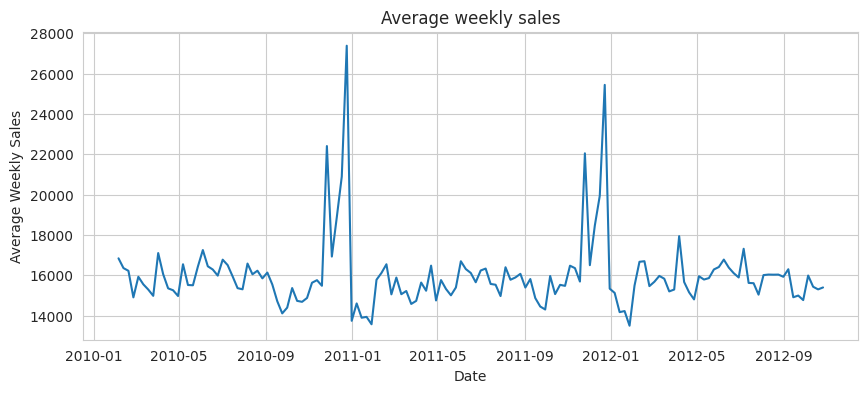

In [27]:
# plot the trend of weekly sales over time
weekly_sales = df.groupby('Date')['Weekly_Sales'].mean().reset_index()


plt.figure(figsize=(10, 4))
sns.lineplot(data=weekly_sales,x='Date', y = 'Weekly_Sales')
plt.xlabel('Date')
plt.ylabel('Average Weekly Sales')
plt.title('Average weekly sales')
plt.show()


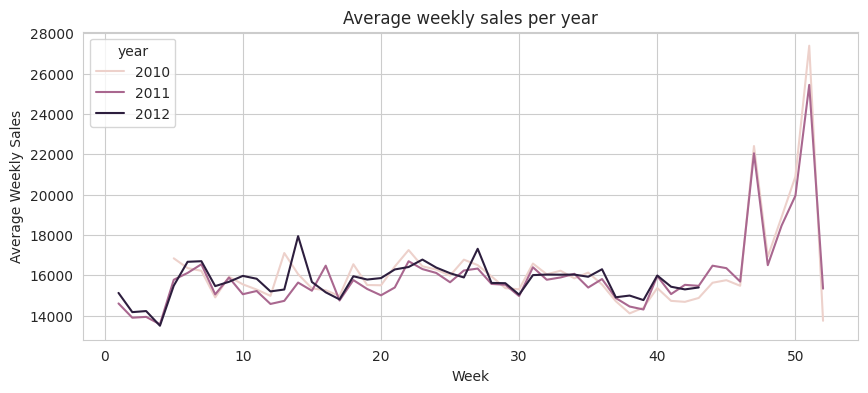

In [28]:
df['week'] = df['week'].astype(int)

yearly_sales = df.groupby(['week','year'])['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(10, 4))

sns.lineplot(data=yearly_sales, x='week', y = 'Weekly_Sales',hue='year')


plt.xlabel('Week')
plt.ylabel('Average Weekly Sales')
plt.title('Average weekly sales per year')
plt.show()

- Based on the average weekly sales plot, there seems to be a noticeable peak towards the end of the year that occurs consistently over several years. This indicates that there are recurring seasonal trends. This peak is associated with increased consumer spending during the holiday seasons.
- The average weekly sales per year plot exhibits a stable and consistent pattern over three years, with little variation or deviation. This suggests that the underlying factors driving sales remain relatively constant over time.

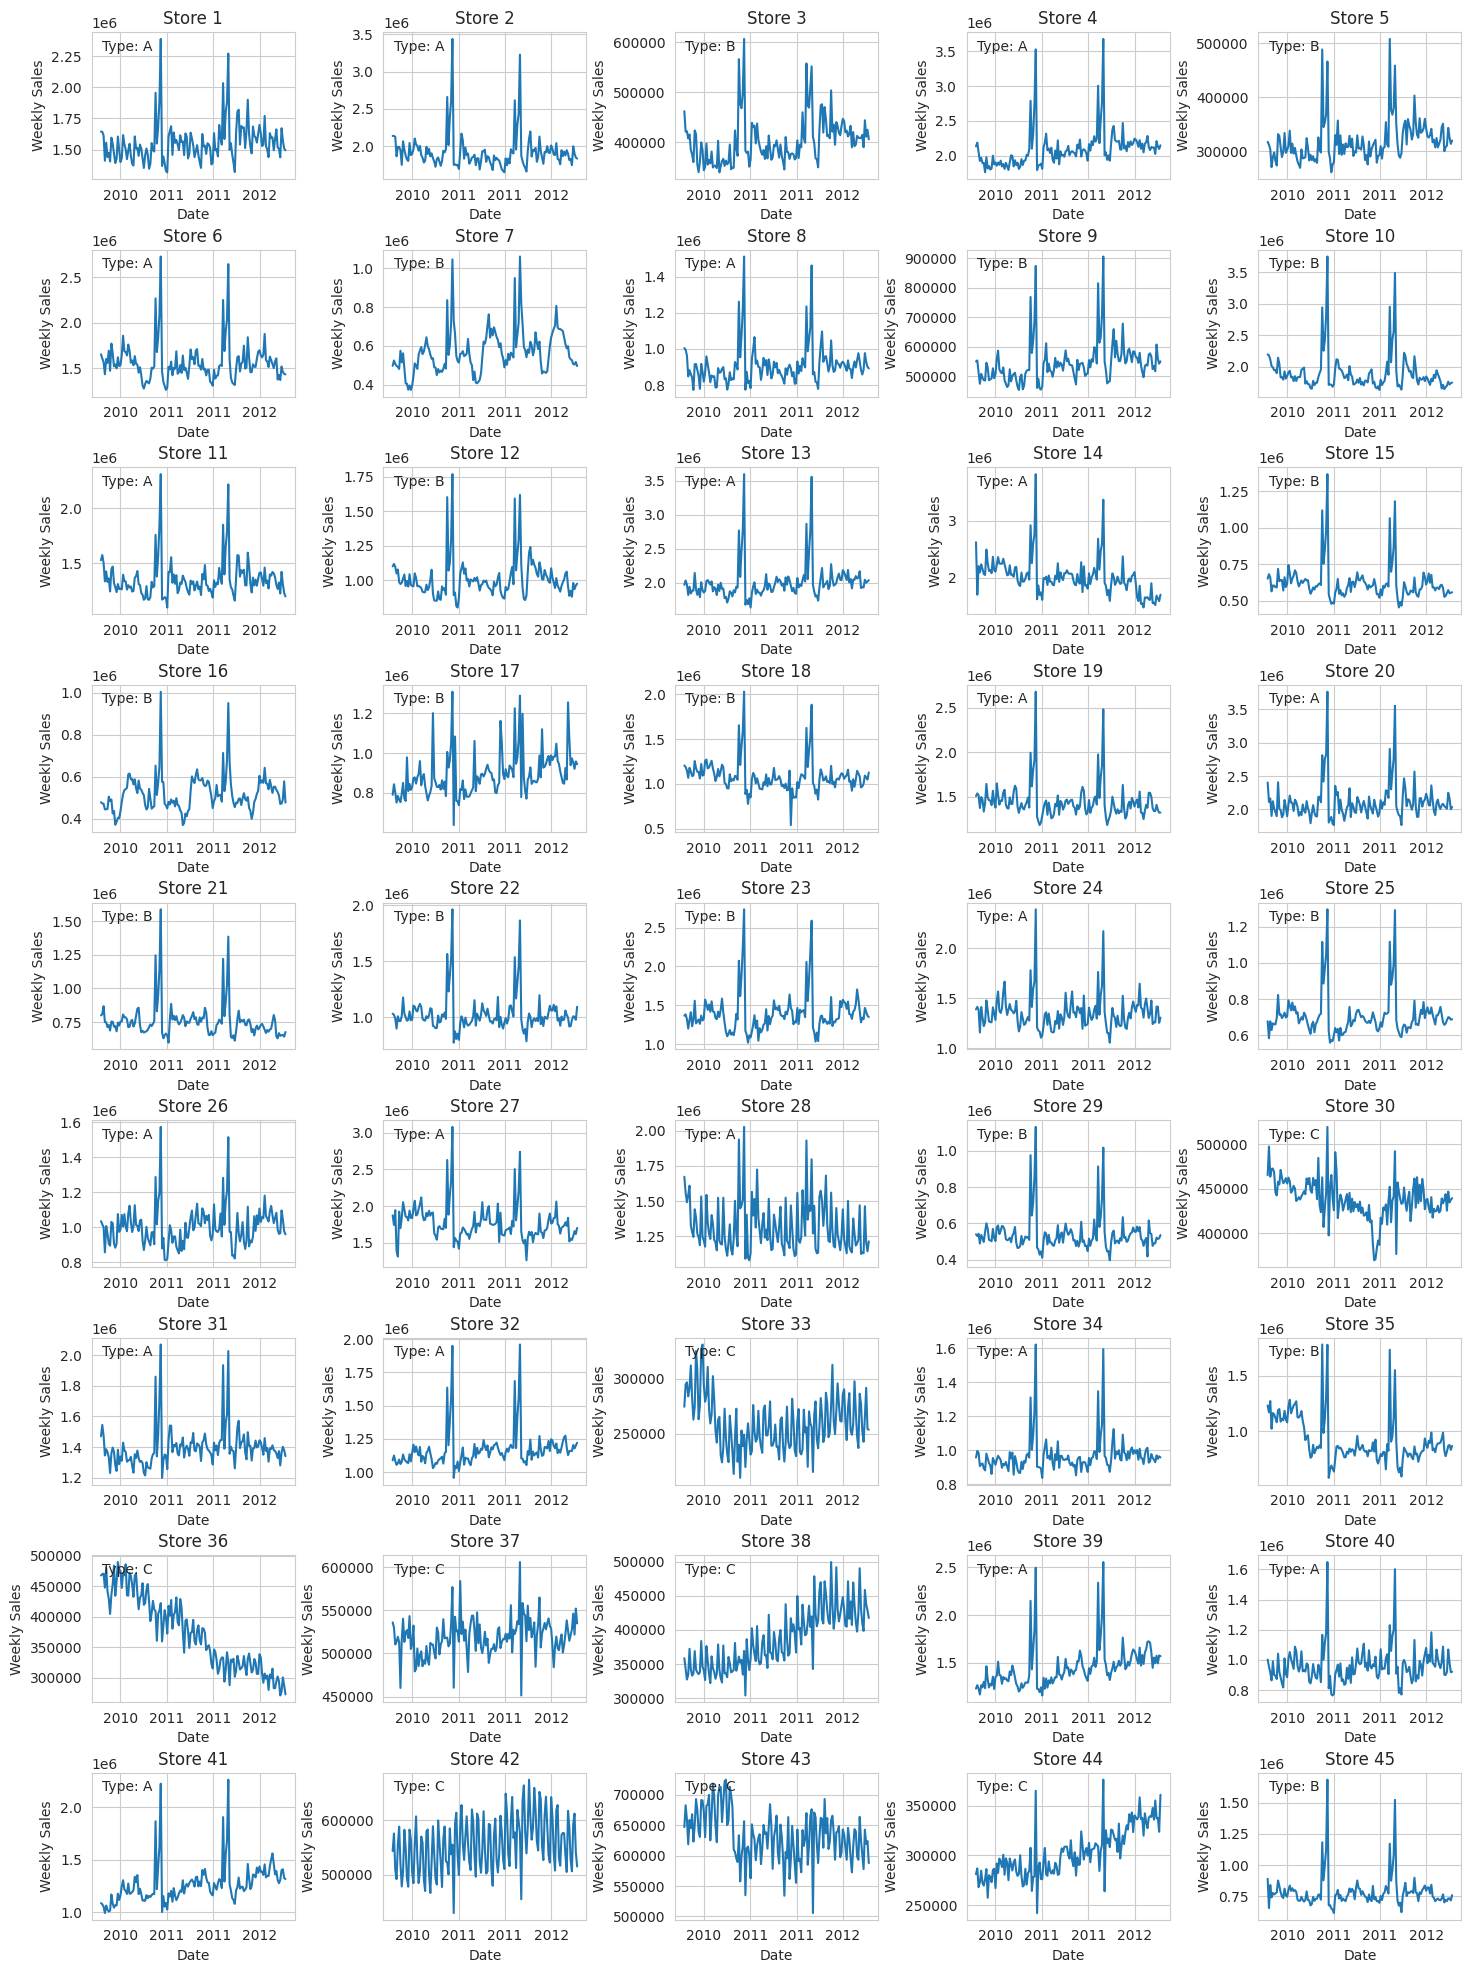

In [29]:
# plot weekly sales by store
data = df.groupby(['Date','Store']).sum()['Weekly_Sales']

fig, axs = plt.subplots(9, 5, figsize=(15, 20))
fig.tight_layout(pad=3.0)

for i, store in enumerate(data.index.get_level_values('Store').unique()):
    store_data = data.loc[data.index.get_level_values('Store') == store]
    ax = axs[i // 5, i % 5]  # Select the appropriate subplot

    sns.lineplot(data=store_data, x=store_data.index.get_level_values('Date'), y=store_data.values, ax=ax)

    ax.set_xlabel('Date')
    ax.set_ylabel('Weekly Sales')
    ax.set_title(f"Store {store}")
    type_values = ', '.join(df[df['Store'] == store]['Type'].unique())
    ax.text(0.05, 0.95, 'Type: {}'.format(type_values), transform=ax.transAxes, fontsize=10, va='top')

    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

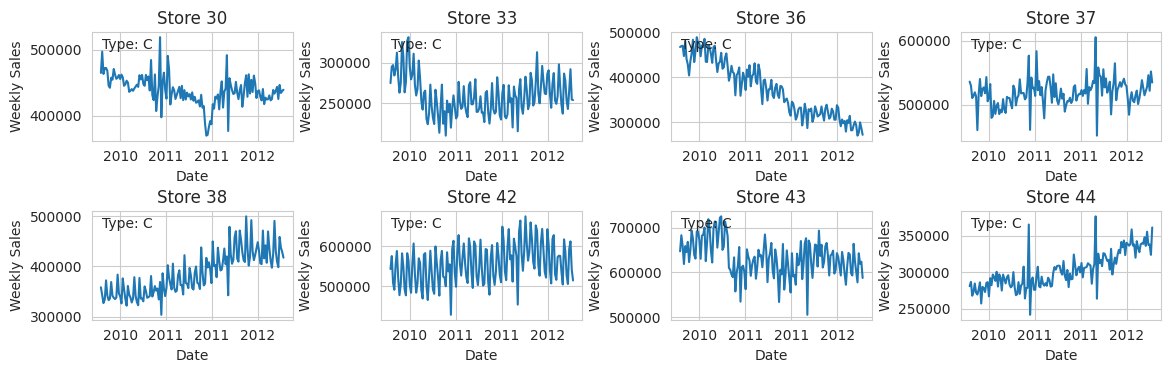

In [30]:
data_c = df[df['Type']=='C'].groupby(['Date','Store']).sum()['Weekly_Sales']
fig, axs = plt.subplots(2, 4, figsize=(12,4))
fig.tight_layout(pad=3.0)

for i, store in enumerate(data_c.index.get_level_values('Store').unique()):
    store_data = data_c.loc[data_c.index.get_level_values('Store') == store]
    ax = axs[i // 4, i % 4]  # Select the appropriate subplot

    sns.lineplot(data=data_c, x=store_data.index.get_level_values('Date'), y=store_data.values, ax=ax)

    ax.set_xlabel('Date')
    ax.set_ylabel('Weekly Sales')
    ax.set_title(f"Store {store}")
    type_values = ', '.join(df[df['Store'] == store]['Type'].unique())
    ax.text(0.05, 0.95, 'Type: {}'.format(type_values), transform=ax.transAxes, fontsize=10, va='top')

    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

If I break down the overall sales patterns into individual stores, we can observe the following:
-  Sores of Type A and B have similar sales trends. Also, as they make up the majority of stores in this category, they reflect the overall trend.
- On the other hand, stores of Type C exhibit fluctuating weekly sales patterns without any clear seasonality.

## MarkDown

Note that MarkDown data is only available after November 2011. As a result, Markdown columns have a significant amount of missing values (over 60 percent). Before deciding to drop these columns, investigate whether Markdown columns exhibit any meaningful relationships with the target variable (Weekly Sales)

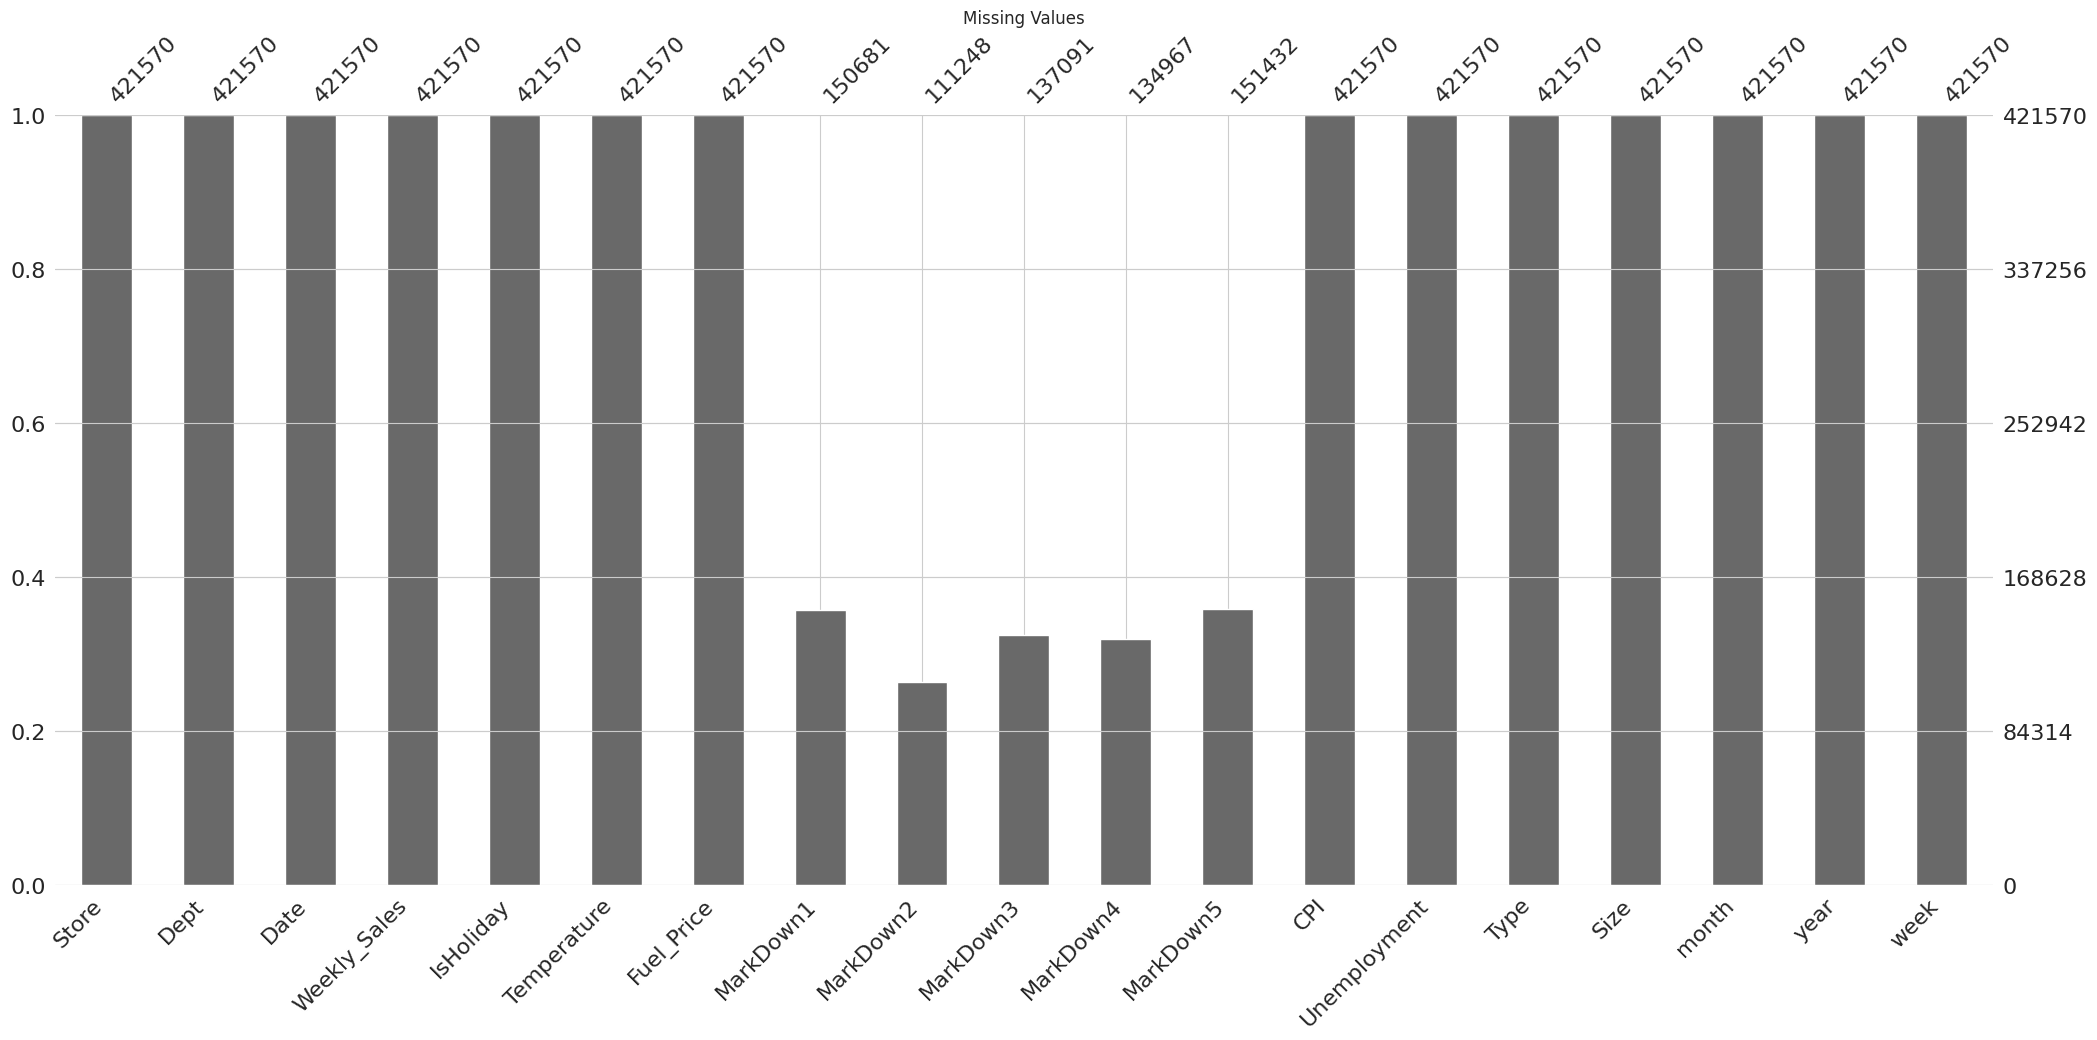

In [31]:
# Using missingno to Identify Missing Data
msno.bar(df)
plt.title('Missing Values')
plt.show()

In [32]:
# plot markdowns and weekly sales
markdown_df = df.select_dtypes(exclude=['bool','object'])
markdown_sales = markdown_df.groupby('Date').mean().reset_index()
markdown_sales = markdown_sales[markdown_sales['Date'] >= pd.to_datetime('2011-11-11')]


fig = go.Figure()

for column in markdown_sales.columns:
    if column.startswith('MarkDown'):
        fig.add_trace(go.Scatter(x=markdown_sales['Date'], y=markdown_sales[column], name=column))

fig.add_trace(go.Scatter(x=markdown_sales['Date'], y=markdown_sales['Weekly_Sales'], name='Weekly Sales'))

fig.update_layout(
    title='Markdown and Sales',
    xaxis_title='Date',
    yaxis_title='Weekly Sales',
)

fig.show()

Note that Markdown information is limited to November 11, 2011, to October 26, 2012.

Within this timeframe, the following holidays are observed:
- Super Bowl on February 10, 2012
- Labor Day on September 7, 2012,
- Thanksgiving on November 25, 2011
- Christmas on December 30, 2011.

In [33]:
markdown_sales[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].describe()

,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
count,51.000000,48.000000,51.000000,51.000000,51.000000
mean,7248.558856,2633.081441,1384.435813,3288.831690,4625.532989
std,5986.253699,6994.682987,8647.529884,4902.603512,2554.451443
min,587.152547,23.115709,0.270000,70.420365,1891.406624
25%,4296.635367,92.417075,18.062954,843.443397,3172.167390
50%,5460.935432,211.123149,56.536565,1924.698826,3861.637002
75%,8350.226685,1670.038463,102.946504,3236.925171,5832.907671
max,38318.227017,41809.250023,61817.075106,31502.484083,18683.272846


In general, Markdowns exhibit a consistent pattern throughout the year, with one notable exception: a significant spike in sales leading up to the holidays. This peak is particularly extreme, as evidenced by the large difference between the maximum and mean values and a high standard deviation. Each promotional markdown event seems to precede this major holiday surge. Markdown 3, for example, experiences a dramatic increase of 61817.05 during Thanksgiving but remains stable during the remainder of the year with a median of 56 and a mean of 1348. Markdowns 1 and 4 both experience peaks during the Superbowl, while Markdown 4 is specifically geared towards Christmas. Markdown 5 falls between Thanksgiving and Christmas.

## Holiday

In [34]:
holiday_sales = df.groupby('IsHoliday')['Weekly_Sales'].mean().reset_index()


fig = px.bar(holiday_sales,
             x='IsHoliday',
             y='Weekly_Sales',
             title="Total Sales",
             labels={'IsHoliday':'Holiday', 'Weekly_Sales':'Weekly Sales'},
             template='ggplot2')

fig.update_layout(height=400, width=450)

fig.show()

The four holidays fall within the following weeks in the dataset

- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12
- Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12
- Thanksgiving: 26-Nov-10, 25-Nov-11
- Christmas: 31-Dec-10, 30-Dec-11

In [35]:
# Add holiday columns
holiday_dates = {
    'Super Bowl': [
        datetime(2010, 2, 12),
        datetime(2011, 2, 11),
        datetime(2012, 2, 10),
    ],
    'Labor Day': [
        datetime(2010, 9, 10),
        datetime(2011, 9, 9),
        datetime(2012, 9, 7),
    ],
    'Thanksgiving': [
        datetime(2010, 11, 26),
        datetime(2011, 11, 25),
    ],
    'Christmas': [
        datetime(2010, 12, 31),
        datetime(2011, 12, 30),
    ]
}

df['Holiday'] = df['Date'].apply(
    lambda x: next((holiday for holiday, dates in holiday_dates.items() if x in dates ), 'No Event'))



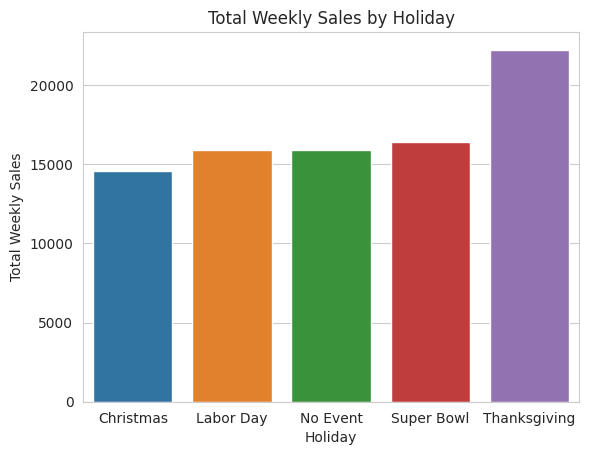

In [36]:
#holiday_sales = holiday_sales[holiday_sales['Holiday'] != 'No Event']
holiday_sales = df.groupby('Holiday')['Weekly_Sales'].mean().reset_index()

sns.barplot(data=holiday_sales, x='Holiday', y='Weekly_Sales')
plt.xlabel('Holiday')
plt.ylabel('Total Weekly Sales')
plt.title('Total Weekly Sales by Holiday')
plt.show()

According to the plot, Thanksgiving has the highest average weekly sales compared to the other three holidays. Surprisingly, Christmas has the least impact on sales. However, I noticed some conflicting information in the Sales Trends section. It's logical that people would do their Christmas shopping before the actual holiday week. To investigate further, I added an additional column to analyze the sales impact of the week before and after each holiday.

In [37]:
df['Holiday_week'] = df['Date'].apply(
    lambda x: next(
        (holiday if x in dates else f'before_{holiday}' if (x + pd.DateOffset(weeks=1)) in dates
         else f'after_{holiday}' if (x - pd.DateOffset(weeks=1)) in dates else 'No Event'
         for holiday, dates in holiday_dates.items() if x in dates or (x + pd.DateOffset(weeks=1)) in dates or (x - pd.DateOffset(weeks=1)) in dates),
        'No Event'
    )
)

In [38]:
holiday_sales_week = df.groupby('Holiday_week')['Weekly_Sales'].mean().sort_values().reset_index()
holiday_sales_week

,Holiday_week,Weekly_Sales
0,Christmas,14543.387158
1,after_Labor Day,14827.044248
2,after_Christmas,14862.139543
3,before_Thanksgiving,15580.153946
4,No Event,15734.299160
5,before_Labor Day,15811.986003
6,Labor Day,15881.693339
7,before_Super Bowl,16029.516788
8,Super Bowl,16377.996441
9,after_Super Bowl,16484.512808


In [39]:
fig = px.bar(holiday_sales_week,
             x='Holiday_week',
             y='Weekly_Sales',
             title="Total Sales",
             labels={'Holiday_week':'Holiday', 'Weekly_Sales':'Weekly Sales'},
             template='ggplot2')


fig.show()

Now the week leading up to Christmas sees the highest average weekly sales of the year.

## Correlation

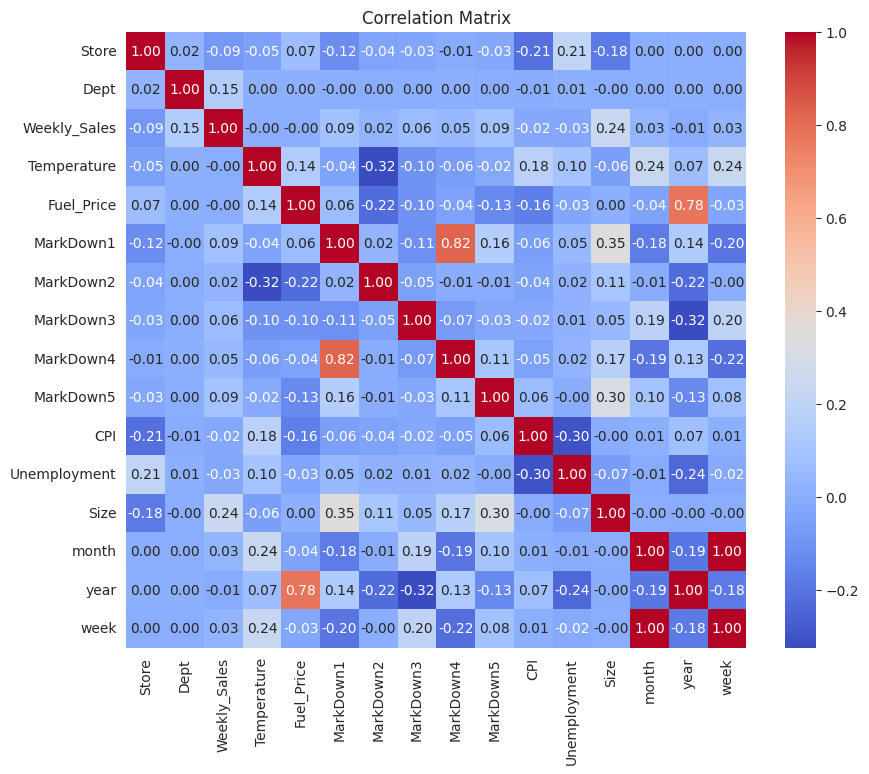

In [40]:
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

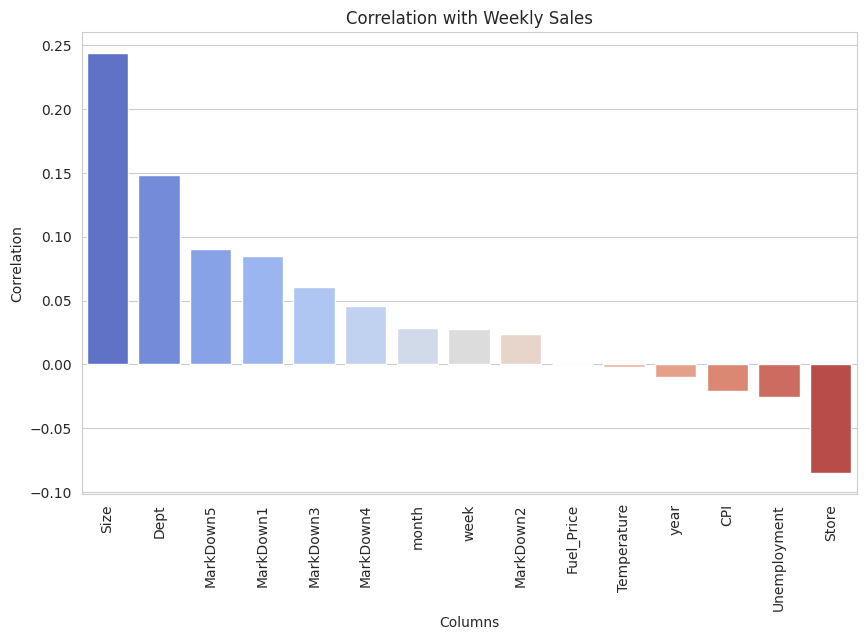

In [41]:
correlations = correlation_matrix['Weekly_Sales'].drop('Weekly_Sales').sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette="coolwarm")
plt.title("Correlation with Weekly Sales")
plt.xlabel("Columns")
plt.ylabel("Correlation")
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Unemployment', ylabel='Weekly_Sales'>

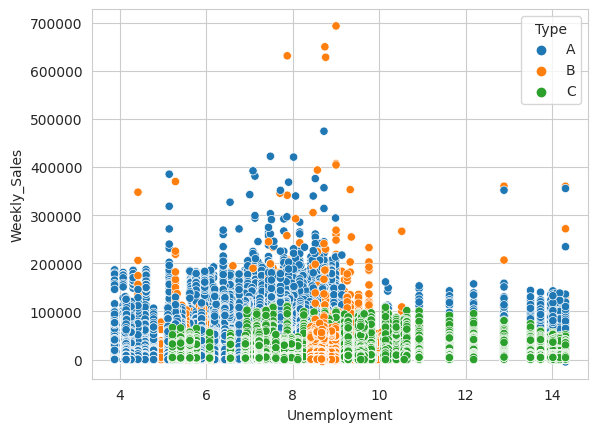

In [42]:
sns.scatterplot(data=df, x='Unemployment', y='Weekly_Sales',hue='Type')

<Axes: xlabel='CPI', ylabel='Weekly_Sales'>

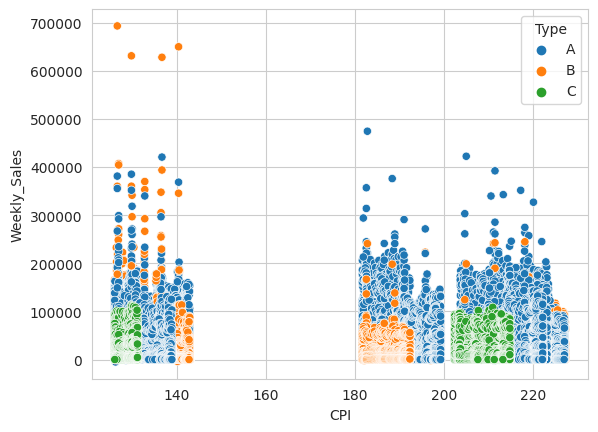

In [43]:
sns.scatterplot(data=df, x='CPI', y='Weekly_Sales',hue='Type')

<Axes: xlabel='Size', ylabel='Weekly_Sales'>

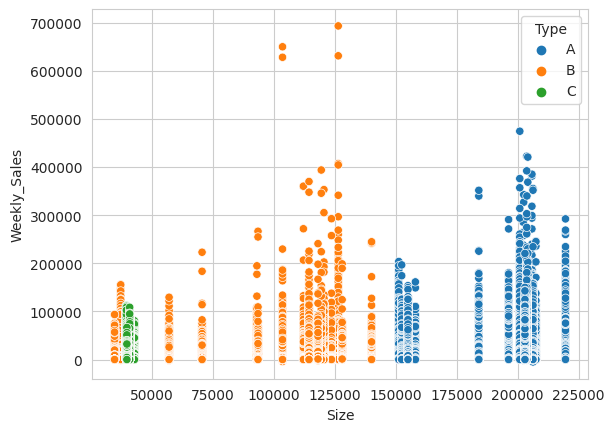

In [44]:
sns.scatterplot(data=df, x='Size', y='Weekly_Sales',hue='Type')